In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import plotly.express as px


In [136]:
data = pd.read_csv('2021_Building_Energy_Benchmarking.csv')

In [137]:
data.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingName', 'BuildingType',
       'TaxParcelIdentificationNumber', 'Address', 'City', 'State', 'ZipCode',
       'Latitude', 'Longitude', 'Neighborhood', 'CouncilDistrictCode',
       'YearBuilt', 'NumberofFloors', 'NumberofBuildings', 'PropertyGFATotal',
       'PropertyGFABuilding(s)', 'PropertyGFAParking', 'ENERGYSTARScore',
       'SiteEUIWN(kBtu/sf)', 'SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SourceEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'EPAPropertyType', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'Electricity(kWh)', 'SteamUse(kBtu)',
       'NaturalGas(therms)', 'ComplianceStatus', 'ComplianceIssue',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity'],
      dtype='object')

C:\Users\maxpl\AppData\Local\Temp\ipykernel_13896\1794321463.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

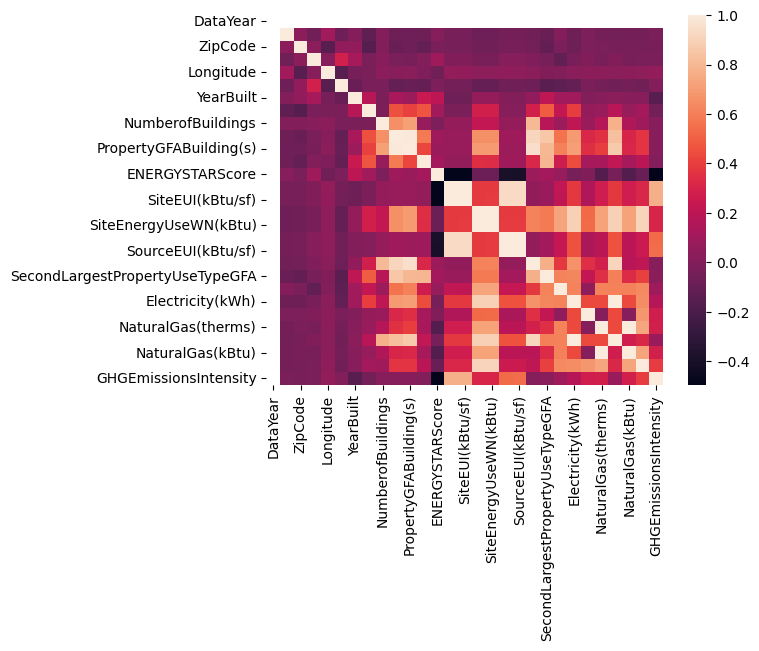

In [138]:
sns.heatmap(data.corr())

In [139]:
data = data[['BuildingType','OSEBuildingID','YearBuilt','ZipCode','Electricity(kWh)','PropertyGFATotal','ENERGYSTARScore','NumberofFloors']]

In [140]:
data.describe()

,YearBuilt,ZipCode,Electricity(kWh),PropertyGFATotal,ENERGYSTARScore,NumberofFloors
count,3601.000000,3546.000000,3.503000e+03,3.601000e+03,2553.000000,3601.000000
mean,1973.157456,98116.629724,9.468902e+05,1.070763e+05,73.232276,5.073868
std,34.789269,17.039279,2.639922e+06,2.346923e+05,25.697856,5.706876
min,1896.000000,98101.000000,0.000000e+00,2.000000e+04,1.000000,0.000000
25%,1953.000000,98105.000000,1.787300e+05,2.961900e+04,60.000000,3.000000
50%,1980.000000,98112.000000,3.327620e+05,4.725800e+04,82.000000,4.000000
75%,2002.000000,98122.000000,7.793565e+05,1.010460e+05,93.000000,6.000000
max,2021.000000,98199.000000,7.925876e+07,9.320156e+06,100.000000,76.000000


In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3663 entries, 0 to 3662
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BuildingType      3601 non-null   object 
 1   OSEBuildingID     3663 non-null   object 
 2   YearBuilt         3601 non-null   float64
 3   ZipCode           3546 non-null   float64
 4   Electricity(kWh)  3503 non-null   float64
 5   PropertyGFATotal  3601 non-null   float64
 6   ENERGYSTARScore   2553 non-null   float64
 7   NumberofFloors    3601 non-null   float64
dtypes: float64(6), object(2)
memory usage: 229.1+ KB


In [142]:
data.dropna(inplace=True)
data.isnull().sum()

BuildingType        0
OSEBuildingID       0
YearBuilt           0
ZipCode             0
Electricity(kWh)    0
PropertyGFATotal    0
ENERGYSTARScore     0
NumberofFloors      0
dtype: int64

In [143]:
data.columns

Index(['BuildingType', 'OSEBuildingID', 'YearBuilt', 'ZipCode',
       'Electricity(kWh)', 'PropertyGFATotal', 'ENERGYSTARScore',
       'NumberofFloors'],
      dtype='object')

In [144]:
data.head()

,BuildingType,OSEBuildingID,YearBuilt,ZipCode,Electricity(kWh),PropertyGFATotal,ENERGYSTARScore,NumberofFloors
0,NonResidential,1,1927.0,98101.0,944955.0,88434.0,78.0,12.0
1,NonResidential,2,1996.0,98101.0,657478.0,103566.0,96.0,11.0
2,NonResidential,3,1969.0,98101.0,8673722.0,956110.0,96.0,41.0
3,NonResidential,5,1926.0,98101.0,509497.0,61320.0,76.0,10.0
4,NonResidential,8,1980.0,98121.0,1333597.0,175580.0,90.0,18.0


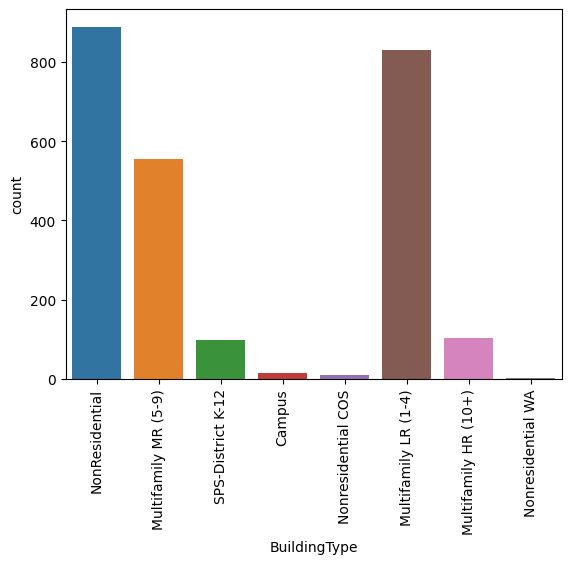

In [145]:
sns.countplot(data = data, x = 'BuildingType')
plt.xticks(rotation=90)
plt.show()

# Retirer data Campus ect car pas assez de données ou améliorer le cleaning

<AxesSubplot: xlabel='YearBuilt', ylabel='OSEBuildingID'>

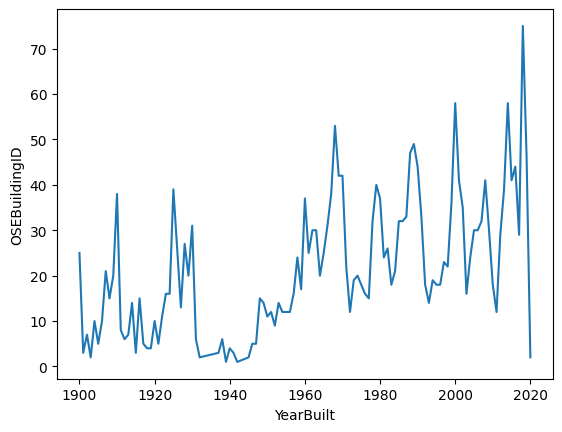

In [146]:
sns.lineplot(x="YearBuilt", y="OSEBuildingID", data=data.groupby('YearBuilt').count().reset_index())

C:\Users\maxpl\AppData\Local\Temp\ipykernel_13896\2757064541.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<AxesSubplot: xlabel='PropertyGFATotal', ylabel='Electricity(kWh)'>

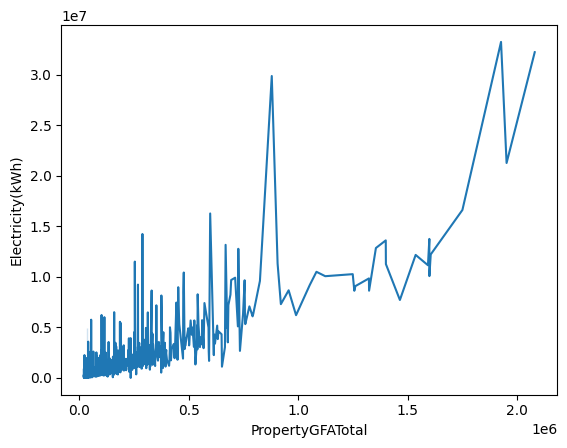

In [147]:
sns.lineplot(x="PropertyGFATotal", y="Electricity(kWh)", data=data.groupby('Electricity(kWh)').mean().reset_index())

In [148]:
data.drop(columns=['BuildingType'], inplace=True)

In [149]:
from sklearn.neighbors import LocalOutlierFactor

estimator = LocalOutlierFactor(100)

result = estimator.fit_predict(data)

data = data.loc[result == 1]
px.scatter(data_frame = data["PropertyGFATotal"])

<AxesSubplot: xlabel='PropertyGFATotal', ylabel='Electricity(kWh)'>

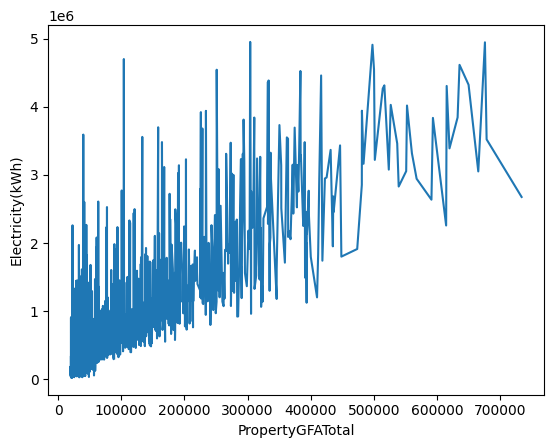

In [150]:
sns.lineplot(x="PropertyGFATotal", y="Electricity(kWh)", data=data)

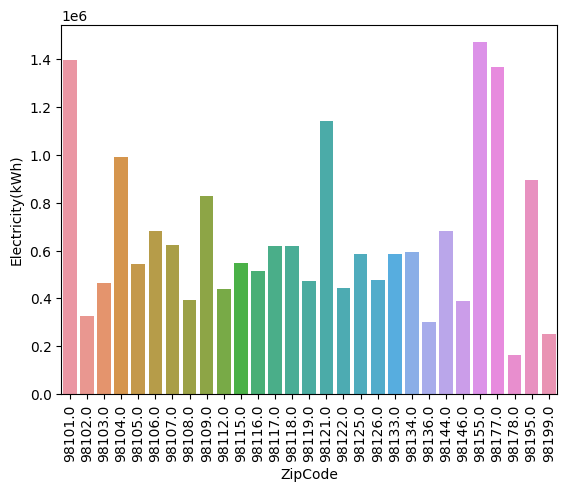

In [151]:
sns.barplot(data=data, x = 'ZipCode', y = 'Electricity(kWh)',errorbar=None)
plt.xticks(rotation=90)
plt.show()  

C:\Users\maxpl\AppData\Local\Temp\ipykernel_13896\1119197534.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

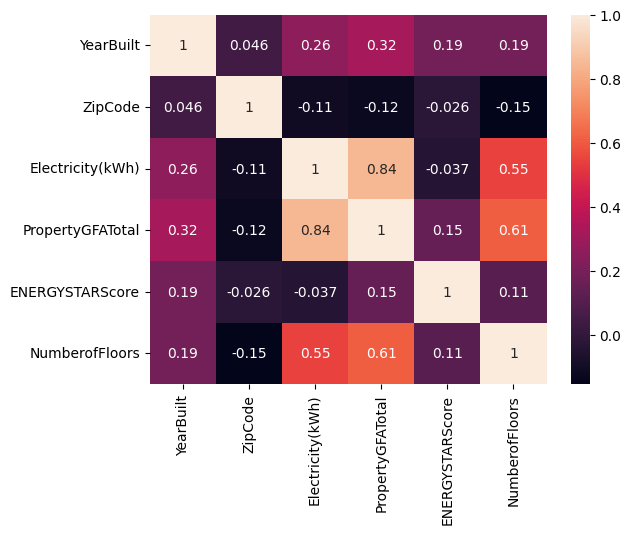

In [152]:
sns.heatmap(data.corr(), annot=True)

<AxesSubplot: xlabel='PropertyGFATotal', ylabel='Electricity(kWh)'>

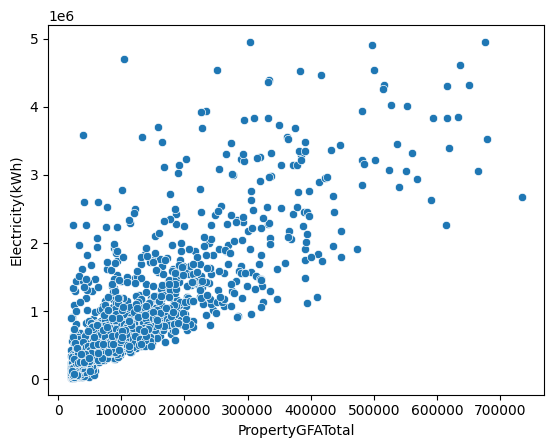

In [153]:
sns.scatterplot(data=data, x="PropertyGFATotal", y="Electricity(kWh)")

In [154]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X = np.array(data["PropertyGFATotal"]).reshape(-1, 1)
y = data["Electricity(kWh)"]
model.fit(X,y)
model.score(X,y)

0.7121001920625172

In [155]:
data.columns

Index(['OSEBuildingID', 'YearBuilt', 'ZipCode', 'Electricity(kWh)',
       'PropertyGFATotal', 'ENERGYSTARScore', 'NumberofFloors'],
      dtype='object')

In [156]:
X = data.drop(columns=['Electricity(kWh)','OSEBuildingID'])
y = data["Electricity(kWh)"]

In [157]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=5)

In [158]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7305361916728883

In [159]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7994250286125446